Correlation matrix:
                opioid_pr_ab  determinant_1  determinant_2  determinant_3  \
opioid_pr_ab        1.000000      -0.002936      -0.503279       0.259184   
determinant_1      -0.002936       1.000000      -0.008425       0.002183   
determinant_2      -0.503279      -0.008425       1.000000      -0.281710   
determinant_3       0.259184       0.002183      -0.281710       1.000000   
determinant_4       0.194841       0.010268      -0.217168       0.145938   
determinant_5       0.015581      -0.000514      -0.018784       0.007675   
determinant_6      -0.001879       0.021238       0.000968      -0.000568   
determinant_7       0.026691       0.039552      -0.016545       0.026473   
determinant_8      -0.141156      -0.018831       0.080282      -0.044919   
determinant_9       0.094683       0.004311      -0.048979       0.028560   
determinant_10     -0.043464      -0.025865       0.057444      -0.074856   
determinant_11     -0.183636      -0.014260       0.1043

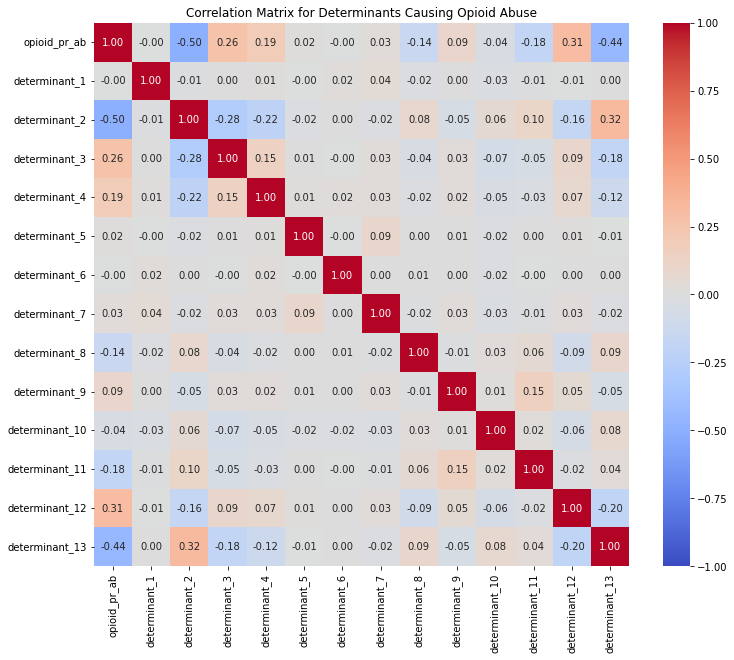

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('cleaned_predictions_2ndjune.csv')

# Drop the 'determinant_pr_ab' column
data = data.drop(columns=['determinant_pr_ab'])

# Select the relevant columns for correlation analysis
columns_to_analyze = [
    'opioid_pr_ab', 'determinant_1', 'determinant_2', 'determinant_3',
    'determinant_4', 'determinant_5', 'determinant_6', 'determinant_7',
    'determinant_8', 'determinant_9', 'determinant_10', 'determinant_11',
    'determinant_12', 'determinant_13'
]

data_to_analyze = data[columns_to_analyze]

# Compute the correlation matrix
correlation_matrix = data_to_analyze.corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Determinants Causing Opioid Abuse")
plt.show()


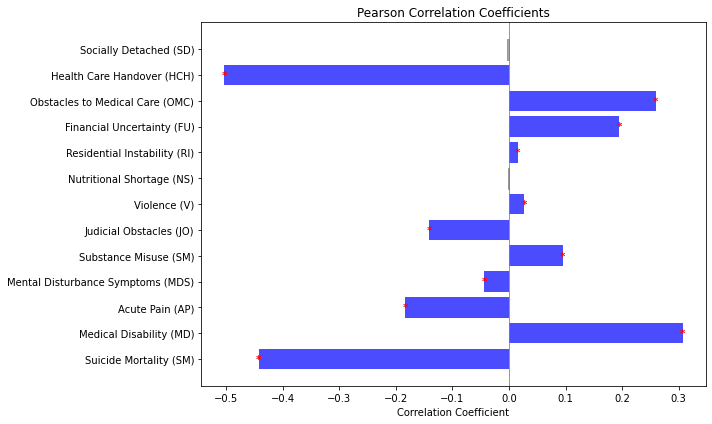

In [5]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the dataset
data = pd.read_csv('cleaned_predictions_2ndjune.csv')

# Drop the 'determinant_pr_ab' column
data = data.drop(columns=['determinant_pr_ab'])

# Define the determinant names in the correct order
determinant_names = {
    'determinant_1': 'Socially Detached (SD)',
    'determinant_2': 'Health Care Handover (HCH)',
    'determinant_3': 'Obstacles to Medical Care (OMC)',
    'determinant_4': 'Financial Uncertainty (FU)',
    'determinant_5': 'Residential Instability (RI)',
    'determinant_6': 'Nutritional Shortage (NS)',
    'determinant_7': 'Violence (V)',
    'determinant_8': 'Judicial Obstacles (JO)',
    'determinant_9': 'Substance Misuse (SM)',
    'determinant_10': 'Mental Disturbance Symptoms (MDS)',
    'determinant_11': 'Acute Pain (AP)',
    'determinant_12': 'Medical Disability (MD)',
    'determinant_13': 'Suicide Mortality (SM)'
}

# Select the relevant columns for correlation analysis
columns_to_analyze = ['opioid_pr_ab'] + list(determinant_names.keys())

data_to_analyze = data[columns_to_analyze]

# Calculate Pearson correlation coefficients and p-values
correlations = {}
p_values = {}
for col in columns_to_analyze[1:]:  # Skip the first column ('opioid_pr_ab')
    corr, p_val = pearsonr(data_to_analyze['opioid_pr_ab'], data_to_analyze[col])
    correlations[col] = corr
    p_values[col] = p_val

# Create a DataFrame for plotting
plot_data = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
plot_data.index = plot_data.index.map(determinant_names)

# Reverse the order of the index for plotting
plot_data = plot_data.iloc[::-1]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(plot_data.index, plot_data['Correlation'], color='blue', alpha=0.7)
plt.axvline(x=0, color='grey', linewidth=0.8)
plt.title('Pearson Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()

# Add significance stars
for index, (key, value) in enumerate(correlations.items()):
    determinant_name = determinant_names[key]
    if p_values[key] < 0.05:
        plt.text(value, plot_data.index.get_loc(determinant_name), '*', ha='center', va='center', color='red', weight='bold')
    if abs(value) < 0.01:  # Small correlations highlighted in gray
        bars[plot_data.index.get_loc(determinant_name)].set_color('gray')

plt.show()
